In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [18]:
print(tf.__version__)

### GPU negative 문제 해결
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

### GPU 사용 가능 여부 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("사용 가능한 GPU:")
    for gpu in gpus:
        print(gpu)
else:
    print("GPU가 인식되지 않았습니다.")

2.17.0
사용 가능한 GPU:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "DejaVu Sans")
plt.rcParams["axes.unicode_minus"] = False

### 경로 불러오기
- train, test 를 따로 불러오지 않고 하나의 폴더째로 불러와서 나눈후 테스트 데이터에 대해서만 증강

In [20]:
def load_images_and_labels(files, label, size):
    images = [image.load_img(p, target_size=(size, size)) for p in files]  # warping
    labels = [label] * len(files)
    print(files)
    return images, labels

In [21]:
man_file= glob('../data/imgs/data_mw/man/*jpg')
wom_file= glob('../data/imgs/data_mw/woman/*jpg')

man_file_224_x, man_file_224_y = load_images_and_labels(man_file, 0, 224)
wom_file_224_x, wom_file_224_y = load_images_and_labels(wom_file, 1, 224)

['../data/imgs/data_mw/man/ma_194.jpg', '../data/imgs/data_mw/man/ma_44.jpg', '../data/imgs/data_mw/man/ma_117.jpg', '../data/imgs/data_mw/man/ma_77.jpg', '../data/imgs/data_mw/man/ma_165.jpg', '../data/imgs/data_mw/man/ma_163.jpg', '../data/imgs/data_mw/man/ma_119.jpg', '../data/imgs/data_mw/man/ma_26.jpg', '../data/imgs/data_mw/man/ma_50.jpg', '../data/imgs/data_mw/man/ma_144.jpg', '../data/imgs/data_mw/man/ma_99.jpg', '../data/imgs/data_mw/man/ma_19.jpg', '../data/imgs/data_mw/man/ma_9.jpg', '../data/imgs/data_mw/man/ma_147.jpg', '../data/imgs/data_mw/man/ma_171.jpg', '../data/imgs/data_mw/man/ma_88.jpg', '../data/imgs/data_mw/man/ma_94.jpg', '../data/imgs/data_mw/man/ma_100.jpg', '../data/imgs/data_mw/man/ma_8.jpg', '../data/imgs/data_mw/man/ma_71.jpg', '../data/imgs/data_mw/man/ma_55.jpg', '../data/imgs/data_mw/man/ma_49.jpg', '../data/imgs/data_mw/man/ma_39.jpg', '../data/imgs/data_mw/man/ma_157.jpg', '../data/imgs/data_mw/man/ma_60.jpg', '../data/imgs/data_mw/man/ma_185.jpg', '.

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
images_224 = man_file_224_x + wom_file_224_x
labels = man_file_224_y + wom_file_224_y
labels = to_categorical(labels)
vector_224 = np.asarray([image.img_to_array(img) for img in images_224])

In [24]:
x_data, y_data = vector_224, labels

In [25]:
# 증강 안하기 여기선 데이터 범위를 -1 과 1 사이로만 지정
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

augmented_images = datagen.flow(x_data, y_data,
                                            shuffle=True,
                                            batch_size=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


(-1.0, 1.0)

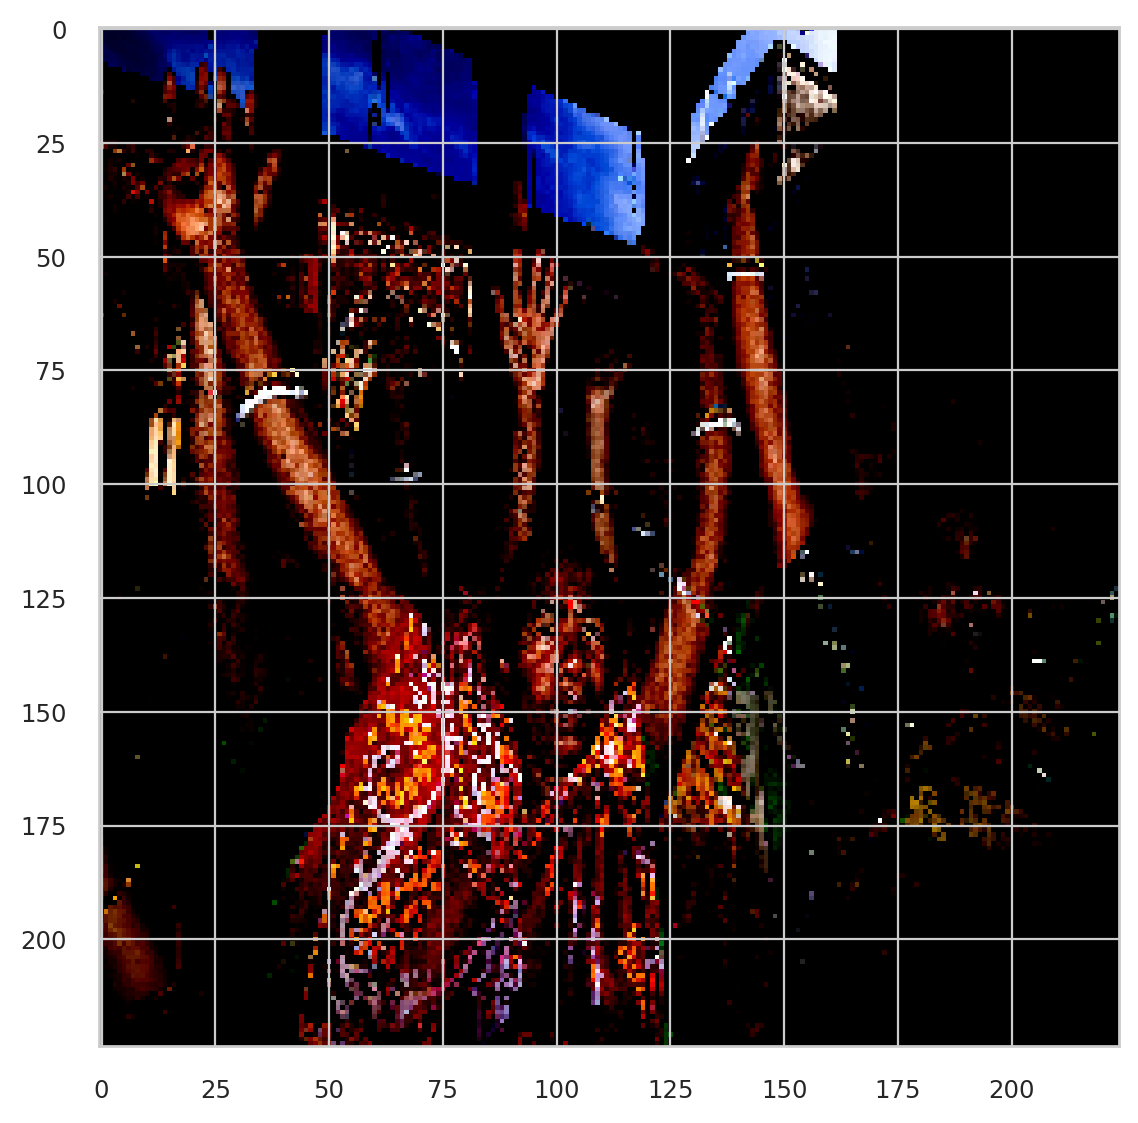

In [26]:
# 데이터 확인 -1 과 1 사이의 값
plt.imshow(augmented_images[0][0][15])
augmented_images[0][0][15].min() , augmented_images[0][0][15].max()

In [27]:
# 모바일 넷 모델 베이스 가져오기

base_model = MobileNet(include_top=True, input_shape=(224,224,3), weights='imagenet')

In [55]:
# 라벨 파일 URL
LABEL_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'

# 라벨 파일 다운로드 및 읽기
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABEL_URL)
with open(labels_path) as f:
    labels = f.readlines()

labels = [label.strip() for label in labels][1:]

정답 : 남자    예측 : cardigan    
정답 : 여자    예측 : bow tie    
정답 : 여자    예측 : shopping basket    
정답 : 여자    예측 : umbrella    
정답 : 남자    예측 : Kerry blue terrier    


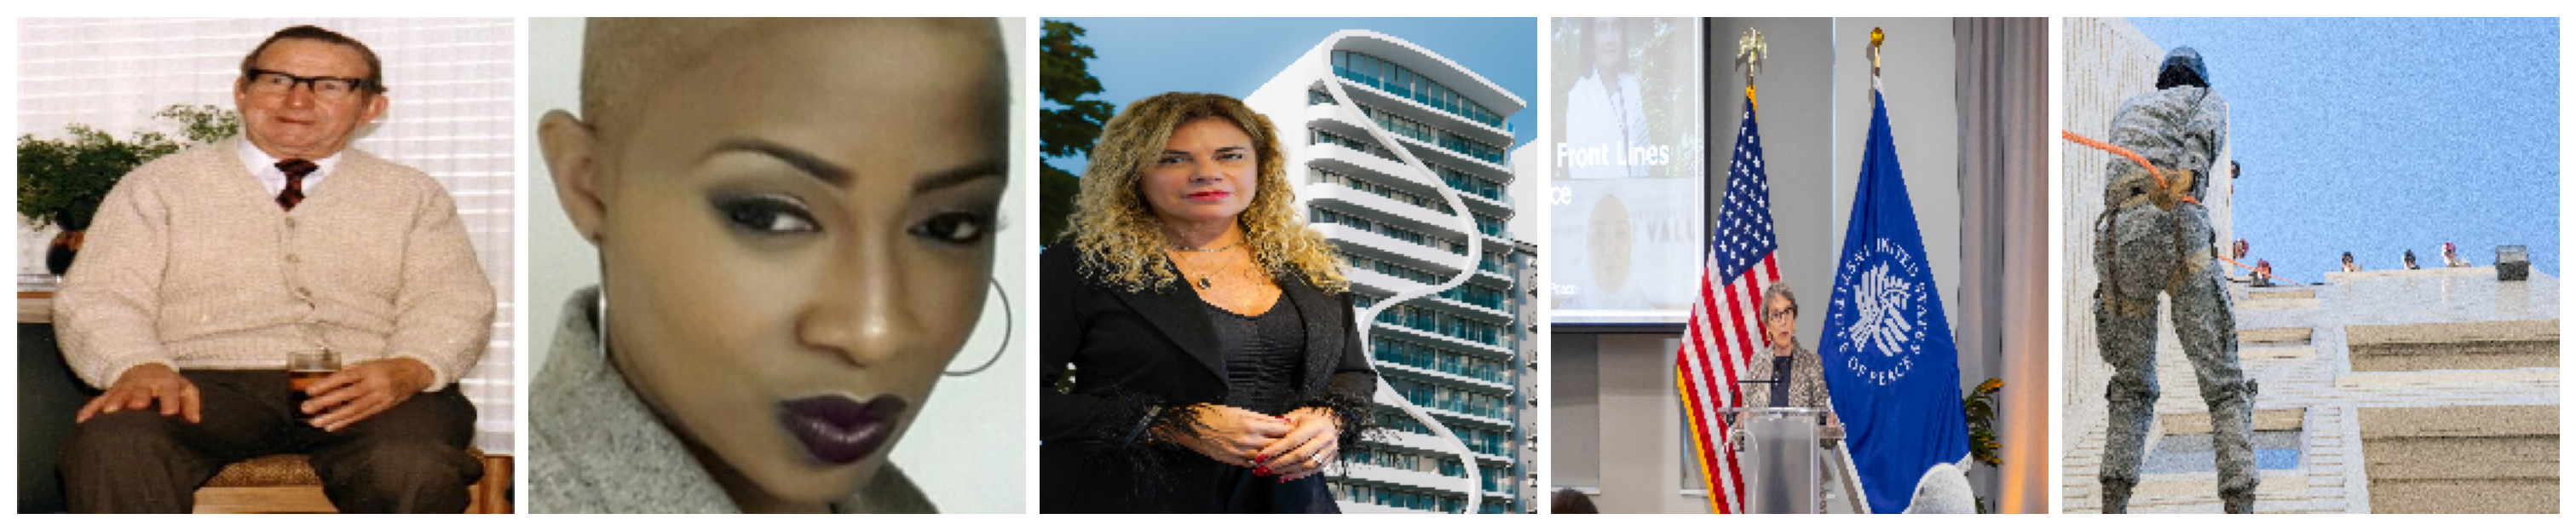

In [118]:
fig, ax = plt.subplots(1,5,figsize=(15,3))

for i,j in enumerate(np.random.randint(1,64,5)):

    print('정답 : ',end='')
    if augmented_images[0][1][j][0] == 1:
        print('남자',end='')
    else:
        print('여자',end='')
    
    ax[i].imshow((augmented_images[0][0][j]+1)/2);
    ax[i].grid(False)
    ax[i].set_axis_off()



    print(f'''\
    예측 : {labels[base_model.predict(augmented_images[0][0][j].reshape(1,224,224,3), verbose=0).argmax()].__str__().strip()}\
    ''', end='\n')